# Introduction to Python Workshop Series 3
**DataFrames and Plotting Data**

\
April 6 at 3:00 PM \
Vincent Scalfani and Lance Simpson \
*The University of Alabama Libraries* \
[Contact Information on UA Libraries Directory](https://www.lib.ua.edu/#/staffdir?liaison=1&department=Rodgers%20Library%20for%20Science%20and%20Engineering)


**Today, attendees will learn how to:**

* Use the pandas data analysis library to load tabular data into DataFrames. 
* Work with DataFrames (e.g., indexing data, basic analysis) 
* Plot variables and tabular data with Matplotlib 

# Annoucements

**Introduction to Python Workshop Series 1: Getting Started** 

**Introduction to Python Workshop Series 2: Functions, Loops, and Conditional Statements**

Archived copy here: https://github.com/vfscalfani/UALIB_Workshops

# Setup For Today

If you would like to follow along intractively with us today:

1. Go to the link provided in the Zoom chat for this Colab notebook. 

2. Save a copy to your Google Drive. You should then be able to run and edit the code interactively.

# pandas Python library

[pandas](https://pandas.pydata.org/) is a popular Python library for data analysis and manipulation. The library extends the functionality of working with structured arrays in [NumPy](https://numpy.org/). A typical use-case for the pandas library would be to analyze a tabular/comma separated dataset containing a mixture of numeric and string data assembled into columns and rows, similar to what you would work with in a spreadsheet application. 



## Pandas Series and DataFrames [1,2]

A pandas [Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) is a one-dimensional array, while a [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) is a two-dimensional array (e.g., multiple columns). Both the Series and DataFrame structures contain an index [1].

Let's start by importing numpy and pandas:

In [1]:
# import with common alias for numpy (np) and pandas (pd):
import numpy as np
import pandas as pd

We can create a pandas series as follows:

In [2]:
atomic_number = pd.Series([25, 26, 27, 28])
atomic_number

0    25
1    26
2    27
3    28
dtype: int64

In [3]:
# get value attribute
atomic_number.values

array([25, 26, 27, 28])

In [4]:
# get index attribute
atomic_number.index

RangeIndex(start=0, stop=4, step=1)

In [5]:
# create another series
symbol = pd.Series(['Mn', 'Fe', 'Co', 'Ni'])
symbol

0    Mn
1    Fe
2    Co
3    Ni
dtype: object

If we want to store multiple columns in one object, we can use DataFrames, using a dictionary assignment, combining the two series:

In [6]:
df = pd.DataFrame({'atomic_number': atomic_number, 'symbol': symbol})
df

,atomic_number,symbol
0,25,Mn
1,26,Fe
2,27,Co
3,28,Ni


References:

[1] https://jakevdp.github.io/PythonDataScienceHandbook/

[2] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame

In order to understand indexing and data operations on pandas [DataFrames](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame), it is probably easier if we have a bit more data to work with...

# Load Data into Colab

See our first workshop for a more thorough explanation on how to upload data into Colab. Here is brief review:

\

**1. Create a folder for the data.**

In [ ]:
pwd

In [ ]:
ls

In [9]:
mkdir workshop3_data

In [ ]:
ls

In [ ]:
cd workshop3_data/

**2. Next, we can use the file navigation window to upload data directly into our new folder. Click on the workshop3_data folder `three dots > upload`. We'll upload a sample file called CID51840.txt, which is available on the [UALIB_Workshops GitHub Repository](https://github.com/vfscalfani/UALIB_Workshops/tree/master/01_MATLAB/Mdata). Click on the CID51840.txt. file, then right click on `Raw > Save Link as`.**

In [ ]:
ls

**3. Now we can import the data into a pandas DataFrame using the [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv) method:**

In [13]:
data_df = pd.read_csv('CID51840_similar.txt', sep = '\t')

In [14]:
# use info() method to print summary information about the DataFrame
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   IsomericSmiles      574 non-null    object 
 1   CID                 574 non-null    int64  
 2   MolecularFormula    574 non-null    object 
 3   MolecularWeight     574 non-null    float64
 4   RotatableBondCount  574 non-null    int64  
 5   HeavyAtomCount      574 non-null    int64  
 6   AtomChiralCount     574 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 31.5+ KB


In [15]:
# view our "data_df" dataframe
data_df

,IsomericSmiles,CID,MolecularFormula,MolecularWeight,RotatableBondCount,HeavyAtomCount,AtomChiralCount
0,CCN(CC(=O)C)C(C1=CC=CC=C1)C(=O)OC(C)(C)C,146168522,C17H25NO3,291.40,8,21,1
1,CCN(CC(=O)OCC)C(C1=CC=CC=C1)C(=O)OC,146168519,C15H21NO4,279.33,9,20,1
2,C1=CC=C(C=C1)CN(CC2=CC=CC=C2)C(C3=CC=C(C=C3)F)...,146161459,C22H20FNO2,349.40,7,26,1
3,CC.CCCN1CCN(CC1)C(C2=CC=CC=C2CC)C(=O)O,145524776,C19H32N2O2,320.50,6,23,1
4,CC.CC.CCC.CC(=C)N1CCN(CC1)C(C2=CC=CC=C2)C(=O)O,145520251,C22H40N2O2,364.60,4,26,1
...,...,...,...,...,...,...,...
569,CN(C)C(CC1=CC=CC=C1)C(=O)O,140236,C11H15NO2,193.24,4,14,1
570,CCCCN(CCCC)C(C1=CC=CC=C1)C(=O)O,51840,C16H25NO2,263.37,9,19,1
571,CCCC[NH+](CCCC)C(C1=CC=CC=C1)C(=O)O.[Cl-],51839,C16H26ClNO2,299.83,9,20,1
572,CCCCN(CCCC)C(C1=CC=CC=C1)C(=O)OCC,51838,C18H29NO2,291.40,11,21,1


By defualt, pandas only displays a limited number of rows. We can adjust this as desired with the [options](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html) attribute.

In [16]:
# change to 600 for workshop
pd.options.display.max_rows = 50

Then, you can specify exactly how many rows to display with the `head()` function:

In [17]:
data_df.head(20)

,IsomericSmiles,CID,MolecularFormula,MolecularWeight,RotatableBondCount,HeavyAtomCount,AtomChiralCount
0,CCN(CC(=O)C)C(C1=CC=CC=C1)C(=O)OC(C)(C)C,146168522,C17H25NO3,291.40,8,21,1
1,CCN(CC(=O)OCC)C(C1=CC=CC=C1)C(=O)OC,146168519,C15H21NO4,279.33,9,20,1
2,C1=CC=C(C=C1)CN(CC2=CC=CC=C2)C(C3=CC=C(C=C3)F)...,146161459,C22H20FNO2,349.40,7,26,1
3,CC.CCCN1CCN(CC1)C(C2=CC=CC=C2CC)C(=O)O,145524776,C19H32N2O2,320.50,6,23,1
4,CC.CC.CCC.CC(=C)N1CCN(CC1)C(C2=CC=CC=C2)C(=O)O,145520251,C22H40N2O2,364.60,4,26,1
5,CC.CC(C)N(C)C(CC1=CC=CC=C1)C(=O)O,145086414,C15H25NO2,251.36,5,18,1
6,CN(C)C(C1=CC=CC=C1C(F)(F)F)C(=O)O.Cl,144259917,C11H13ClF3NO2,283.67,3,18,1
7,CC1CCC(=C)N1C(C2=CC=CC=C2)C(=O)O,144187943,C14H17NO2,231.29,3,17,2
8,CCC(CCN(C)C(C1=CC=CC=C1)C(=O)O)O,144097938,C14H21NO3,251.32,7,18,2
9,CC=C.CC1=C(C(=CC=C1)C(C(=O)O)N(C)C)C.C#C,144097931,C17H25NO2,275.40,3,20,1


Note that the default index created for data_df was the number of rows: 0-574 as the row labels.

In [18]:
data_df.index

RangeIndex(start=0, stop=574, step=1)

We can specify the index when we are importing with read_csv with the [index_col](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv) option, if for example, we want the index to be the CID column. The result is that the CID numbers are now the row labels, which can be useful for selecting/indexing. Note that the CID values here are already sorted.

In [19]:
data_df2 = pd.read_csv('CID51840_similar.txt', index_col="CID", sep = '\t')
data_df2.head(20)

,IsomericSmiles,MolecularFormula,MolecularWeight,RotatableBondCount,HeavyAtomCount,AtomChiralCount
CID,,,,,,
146168522,CCN(CC(=O)C)C(C1=CC=CC=C1)C(=O)OC(C)(C)C,C17H25NO3,291.40,8,21,1
146168519,CCN(CC(=O)OCC)C(C1=CC=CC=C1)C(=O)OC,C15H21NO4,279.33,9,20,1
146161459,C1=CC=C(C=C1)CN(CC2=CC=CC=C2)C(C3=CC=C(C=C3)F)...,C22H20FNO2,349.40,7,26,1
145524776,CC.CCCN1CCN(CC1)C(C2=CC=CC=C2CC)C(=O)O,C19H32N2O2,320.50,6,23,1
145520251,CC.CC.CCC.CC(=C)N1CCN(CC1)C(C2=CC=CC=C2)C(=O)O,C22H40N2O2,364.60,4,26,1
145086414,CC.CC(C)N(C)C(CC1=CC=CC=C1)C(=O)O,C15H25NO2,251.36,5,18,1
144259917,CN(C)C(C1=CC=CC=C1C(F)(F)F)C(=O)O.Cl,C11H13ClF3NO2,283.67,3,18,1
144187943,CC1CCC(=C)N1C(C2=CC=CC=C2)C(=O)O,C14H17NO2,231.29,3,17,2
144097938,CCC(CCN(C)C(C1=CC=CC=C1)C(=O)O)O,C14H21NO3,251.32,7,18,2


In [20]:
data_df2.index

Int64Index([146168522, 146168519, 146161459, 145524776, 145520251, 145086414,
            144259917, 144187943, 144097938, 144097931,
            ...
               241650,    230747,    230085,    230084,    228214,    140236,
                51840,     51839,     51838,     45157],
           dtype='int64', name='CID', length=574)

# DataFrame Indexing [3-6]

There are two main ways to select subsets of a DataFrame via indexing [3,6].

1. [pd.DataFrame.iloc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html): The iloc property uses integer based indexing (e.g., `[i,j]`, where `i` is the row, and `j` is the column).

2. [pd.DataFrame.loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc): The loc property is label based (e.g., `[row_name, col_name]`)


In [21]:
# Let's use our data_df2 dataframe for demonstration:
data_df2.head(10)

,IsomericSmiles,MolecularFormula,MolecularWeight,RotatableBondCount,HeavyAtomCount,AtomChiralCount
CID,,,,,,
146168522,CCN(CC(=O)C)C(C1=CC=CC=C1)C(=O)OC(C)(C)C,C17H25NO3,291.40,8,21,1
146168519,CCN(CC(=O)OCC)C(C1=CC=CC=C1)C(=O)OC,C15H21NO4,279.33,9,20,1
146161459,C1=CC=C(C=C1)CN(CC2=CC=CC=C2)C(C3=CC=C(C=C3)F)...,C22H20FNO2,349.40,7,26,1
145524776,CC.CCCN1CCN(CC1)C(C2=CC=CC=C2CC)C(=O)O,C19H32N2O2,320.50,6,23,1
145520251,CC.CC.CCC.CC(=C)N1CCN(CC1)C(C2=CC=CC=C2)C(=O)O,C22H40N2O2,364.60,4,26,1
145086414,CC.CC(C)N(C)C(CC1=CC=CC=C1)C(=O)O,C15H25NO2,251.36,5,18,1
144259917,CN(C)C(C1=CC=CC=C1C(F)(F)F)C(=O)O.Cl,C11H13ClF3NO2,283.67,3,18,1
144187943,CC1CCC(=C)N1C(C2=CC=CC=C2)C(=O)O,C14H17NO2,231.29,3,17,2
144097938,CCC(CCN(C)C(C1=CC=CC=C1)C(=O)O)O,C14H21NO3,251.32,7,18,2


## Select a value

In [22]:
# use iloc property to select the molecular formula for row 0
# index position [0,1]
data_df2.iloc[0,1]

'C17H25NO3'

In [23]:
# use loc property to select the molecular formula for row 0
# index position [146168522, "MolecularFormula"]
data_df2.loc[146168522, "MolecularFormula"]

'C17H25NO3'

## Select a row or column

Use `:` to select all rows or columns

### rows

In [24]:
# iloc select # index position 3, all columns
data_df2.iloc[3,:]

IsomericSmiles        CC.CCCN1CCN(CC1)C(C2=CC=CC=C2CC)C(=O)O
MolecularFormula                                  C19H32N2O2
MolecularWeight                                        320.5
RotatableBondCount                                         6
HeavyAtomCount                                            23
AtomChiralCount                                            1
Name: 145524776, dtype: object

In [25]:
# loc equivalent:
data_df2.loc[145524776,:]

IsomericSmiles        CC.CCCN1CCN(CC1)C(C2=CC=CC=C2CC)C(=O)O
MolecularFormula                                  C19H32N2O2
MolecularWeight                                        320.5
RotatableBondCount                                         6
HeavyAtomCount                                            23
AtomChiralCount                                            1
Name: 145524776, dtype: object

### columns

In [26]:
# iloc select column # index position 2, all rows
data_df2.iloc[:,2]

CID
146168522    291.40
146168519    279.33
146161459    349.40
145524776    320.50
145520251    364.60
              ...  
140236       193.24
51840        263.37
51839        299.83
51838        291.40
45157        255.31
Name: MolecularWeight, Length: 574, dtype: float64

In [27]:
# loc equivalent:
data_df2.loc[:,"MolecularWeight"]

CID
146168522    291.40
146168519    279.33
146161459    349.40
145524776    320.50
145520251    364.60
              ...  
140236       193.24
51840        263.37
51839        299.83
51838        291.40
45157        255.31
Name: MolecularWeight, Length: 574, dtype: float64

## Select a slice

**.iloc is analgous to Python indexing, where you select values between index positions, however, loc is not and includes both start and stop values:**

In [28]:
# select first rows 0-4, all columns
data_df2.iloc[0:5,:]

,IsomericSmiles,MolecularFormula,MolecularWeight,RotatableBondCount,HeavyAtomCount,AtomChiralCount
CID,,,,,,
146168522,CCN(CC(=O)C)C(C1=CC=CC=C1)C(=O)OC(C)(C)C,C17H25NO3,291.40,8,21,1
146168519,CCN(CC(=O)OCC)C(C1=CC=CC=C1)C(=O)OC,C15H21NO4,279.33,9,20,1
146161459,C1=CC=C(C=C1)CN(CC2=CC=CC=C2)C(C3=CC=C(C=C3)F)...,C22H20FNO2,349.40,7,26,1
145524776,CC.CCCN1CCN(CC1)C(C2=CC=CC=C2CC)C(=O)O,C19H32N2O2,320.50,6,23,1
145520251,CC.CC.CCC.CC(=C)N1CCN(CC1)C(C2=CC=CC=C2)C(=O)O,C22H40N2O2,364.60,4,26,1


In [29]:
# the 5th row here is index position 4:
data_df2.iloc[4,:]

IsomericSmiles        CC.CC.CCC.CC(=C)N1CCN(CC1)C(C2=CC=CC=C2)C(=O)O
MolecularFormula                                          C22H40N2O2
MolecularWeight                                                364.6
RotatableBondCount                                                 4
HeavyAtomCount                                                    26
AtomChiralCount                                                    1
Name: 145520251, dtype: object

In [30]:
# loc is a little different, and includes start and stop values:
data_df2.loc[146168522:145520251,:]

,IsomericSmiles,MolecularFormula,MolecularWeight,RotatableBondCount,HeavyAtomCount,AtomChiralCount
CID,,,,,,
146168522,CCN(CC(=O)C)C(C1=CC=CC=C1)C(=O)OC(C)(C)C,C17H25NO3,291.40,8,21,1
146168519,CCN(CC(=O)OCC)C(C1=CC=CC=C1)C(=O)OC,C15H21NO4,279.33,9,20,1
146161459,C1=CC=C(C=C1)CN(CC2=CC=CC=C2)C(C3=CC=C(C=C3)F)...,C22H20FNO2,349.40,7,26,1
145524776,CC.CCCN1CCN(CC1)C(C2=CC=CC=C2CC)C(=O)O,C19H32N2O2,320.50,6,23,1
145520251,CC.CC.CCC.CC(=C)N1CCN(CC1)C(C2=CC=CC=C2)C(=O)O,C22H40N2O2,364.60,4,26,1


## Select by Condition

The [DataFrame.loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) property can also be used to select data based on a condition (e.g., filtering data) [4].

You can use [comparison operators](https://docs.python.org/3/library/stdtypes.html#boolean-operations-and-or-not) and even combine them with boolean operators [4].

In [31]:
# select rows where the RotatableBondCount is greater than 12
data_df2.loc[data_df2['RotatableBondCount'] > 12]

,IsomericSmiles,MolecularFormula,MolecularWeight,RotatableBondCount,HeavyAtomCount,AtomChiralCount
CID,,,,,,
142440523,CCCCCCCCCN(CCCCCCCCC)C(CC1=CC=CC=C1)C(=O)O,C27H47NO2,417.7,20,30,1
141647327,CCNCCNCCCNCCNC(C1=CC=CC=C1)C(=O)O,C17H30N4O2,322.4,14,23,1
140080120,CCCCCCCCCCCCOC(=O)C(C1=CC=CC=C1)N(C)C,C22H37NO2,347.5,15,25,1
140043255,CCCCCCCCCCCCCCC(=O)N[C@@H](C1=CC=CC=C1)C(=O)O,C23H37NO3,375.5,16,27,1
117918444,CCCCCCCCCCCN(CCCCCCCCC)[C@@H](CC1=CC=CC=C1)C(=O)O,C29H51NO2,445.7,22,32,1
89640554,CCCCCCCCCCCCN(CCCCCCCCCCCC)C(CC1=CC=CC=C1)C(=O)O,C33H59NO2,501.8,26,36,1
88717591,CCCCCCCCC/C=C/CCCNC(C1=CC=CC=C1)C(=O)O,C22H35NO2,345.5,15,25,1
87110555,CC/C=C/C/C=C/C/C=C/C/C=C/C/C=C/C/C=C/CCC(=O)NC...,C30H39NO3,461.6,17,34,1
68981468,CCCCCCCCCCCCC(C(=O)O)N(C)CC1=CC=CC=C1,C22H37NO2,347.5,15,25,1


In [32]:
# note that you can also specifiy columns to return
data_df2.loc[data_df2['RotatableBondCount'] > 12, ['IsomericSmiles','RotatableBondCount']]

,IsomericSmiles,RotatableBondCount
CID,,
142440523,CCCCCCCCCN(CCCCCCCCC)C(CC1=CC=CC=C1)C(=O)O,20
141647327,CCNCCNCCCNCCNC(C1=CC=CC=C1)C(=O)O,14
140080120,CCCCCCCCCCCCOC(=O)C(C1=CC=CC=C1)N(C)C,15
140043255,CCCCCCCCCCCCCCC(=O)N[C@@H](C1=CC=CC=C1)C(=O)O,16
117918444,CCCCCCCCCCCN(CCCCCCCCC)[C@@H](CC1=CC=CC=C1)C(=O)O,22
89640554,CCCCCCCCCCCCN(CCCCCCCCCCCC)C(CC1=CC=CC=C1)C(=O)O,26
88717591,CCCCCCCCC/C=C/CCCNC(C1=CC=CC=C1)C(=O)O,15
87110555,CC/C=C/C/C=C/C/C=C/C/C=C/C/C=C/C/C=C/CCC(=O)NC...,17
68981468,CCCCCCCCCCCCC(C(=O)O)N(C)CC1=CC=CC=C1,15


In [33]:
# select rows where the RotatableBondCount is greater than 12 and the MolecularWeight is less than 400
data_df2.loc[(data_df2['RotatableBondCount'] > 12) & (data_df2['MolecularWeight'] < 400)]

,IsomericSmiles,MolecularFormula,MolecularWeight,RotatableBondCount,HeavyAtomCount,AtomChiralCount
CID,,,,,,
141647327,CCNCCNCCCNCCNC(C1=CC=CC=C1)C(=O)O,C17H30N4O2,322.4,14,23,1
140080120,CCCCCCCCCCCCOC(=O)C(C1=CC=CC=C1)N(C)C,C22H37NO2,347.5,15,25,1
140043255,CCCCCCCCCCCCCCC(=O)N[C@@H](C1=CC=CC=C1)C(=O)O,C23H37NO3,375.5,16,27,1
88717591,CCCCCCCCC/C=C/CCCNC(C1=CC=CC=C1)C(=O)O,C22H35NO2,345.5,15,25,1
68981468,CCCCCCCCCCCCC(C(=O)O)N(C)CC1=CC=CC=C1,C22H37NO2,347.5,15,25,1
66826250,CCCCCCCCCCCCC(C1=CC=CC=C1)(C(=O)O)N(C)C,C22H37NO2,347.5,14,25,1
20293079,CCCCCCCCCCCCNC(C1=CC=CC=C1)C(=O)O,C20H33NO2,319.5,14,23,1
12900587,CCCCCCCCCCCC(=O)N[C@@H](C1=CC=CC=C1)C(=O)O,C20H31NO3,333.5,13,24,1
4595868,CCCCCCCCCCC(C(=O)OC)[N+](C)(C)CC1=CC=CC=C1,C22H38NO2+,348.5,14,25,1


You can get creative with selecting/filtering. For example, you can even filter based on string matching with the [str.contains](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html?highlight=str%20contains#pandas.Series.str.contains) method [5].

In [34]:
# select rows where IsomericSmiles contains an "@"
data_df2.loc[data_df2['IsomericSmiles'].str.contains("@")]

,IsomericSmiles,MolecularFormula,MolecularWeight,RotatableBondCount,HeavyAtomCount,AtomChiralCount
CID,,,,,,
144097912,CCCC1=C(C(=CC=C1)[C@H](C(=O)O)N2CCCCC2)F,C16H22FNO2,279.35,5,20,1
143939569,CCCC1=CC(=CC=C1)[C@H](C(=O)O)N2CCCCC2,C16H23NO2,261.36,5,19,1
142790501,CC1(CCN(CC1)[C@@H](C2=CC=CC=C2)C(=O)O)O,C14H19NO3,249.30,3,18,1
142790500,CCN[C@@H](C1=CC=CC=C1)C(=O)O.Cl,C10H14ClNO2,215.67,4,14,1
142418893,CCC1=CC=C(C=C1)C(C(=O)O)N2CC[C@H](C2)C,C15H21NO2,247.33,4,18,2
...,...,...,...,...,...,...
909981,COC(=O)[C@H](C1=CC=CC=C1)N2CCCCCC2,C15H21NO2,247.33,4,18,1
825994,CN(CC1=CC=CC=C1)[C@@H](CC2=CC=CC=C2)C(=O)O,C17H19NO2,269.34,6,20,1
682102,CC(=O)N(C)[C@@H](C1=CC=CC=C1)C(=O)O,C11H13NO3,207.23,3,15,1


In [35]:
# select rows where IsomericSmiles does not contain an "@"
data_df2.loc[~data_df2['IsomericSmiles'].str.contains("@")]

,IsomericSmiles,MolecularFormula,MolecularWeight,RotatableBondCount,HeavyAtomCount,AtomChiralCount
CID,,,,,,
146168522,CCN(CC(=O)C)C(C1=CC=CC=C1)C(=O)OC(C)(C)C,C17H25NO3,291.40,8,21,1
146168519,CCN(CC(=O)OCC)C(C1=CC=CC=C1)C(=O)OC,C15H21NO4,279.33,9,20,1
146161459,C1=CC=C(C=C1)CN(CC2=CC=CC=C2)C(C3=CC=C(C=C3)F)...,C22H20FNO2,349.40,7,26,1
145524776,CC.CCCN1CCN(CC1)C(C2=CC=CC=C2CC)C(=O)O,C19H32N2O2,320.50,6,23,1
145520251,CC.CC.CCC.CC(=C)N1CCN(CC1)C(C2=CC=CC=C2)C(=O)O,C22H40N2O2,364.60,4,26,1
...,...,...,...,...,...,...
140236,CN(C)C(CC1=CC=CC=C1)C(=O)O,C11H15NO2,193.24,4,14,1
51840,CCCCN(CCCC)C(C1=CC=CC=C1)C(=O)O,C16H25NO2,263.37,9,19,1
51839,CCCC[NH+](CCCC)C(C1=CC=CC=C1)C(=O)O.[Cl-],C16H26ClNO2,299.83,9,20,1


[3] http://swcarpentry.github.io/python-novice-gapminder/08-data-frames/index.html

[4] https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values

[5] https://stackoverflow.com/questions/27975069/how-to-filter-rows-containing-a-string-pattern-from-a-pandas-dataframe

[6] https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

# DataFrame Operations [7]

There are a variety of built-in [DataFrame methods](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) for data analysis and manipulation such as string modification, counting values, and calculating the mean or median. It is also possible to perform operations on series of data (e.g., col A + Col B).

A descriptive statistics summary can be calculated with the pandas.[DataFrame.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html?highlight=describe#pandas.DataFrame.describe) function:

In [36]:
data_df2.describe()

,MolecularWeight,RotatableBondCount,HeavyAtomCount,AtomChiralCount
count,574.000000,574.000000,574.000000,574.000000
mean,251.558641,5.360627,18.050523,1.177700
std,46.552723,2.875045,3.396830,0.541271
min,163.170000,1.000000,12.000000,0.000000
25%,221.290000,3.000000,16.000000,1.000000
50%,247.330000,5.000000,18.000000,1.000000
75%,275.050000,7.000000,19.000000,1.000000
max,501.800000,26.000000,36.000000,5.000000


By default, only the numeric data is included, we can add the string data with the object option:

In [37]:
data_df2.describe(include=[object])

,IsomericSmiles,MolecularFormula
count,574,574
unique,574,198
top,C1CC1NC(C2=CC=CC=C2)C(=O)O,C11H15NO2
freq,1,25


It looks like all of the IsomericSmiles are unique, but we have several repeated MolecularFormula values. We can take a closer look by selecting the MolecularFormula column, then applying the `value_counts()` method:

In [38]:
data_df2.loc[:,'MolecularFormula'].value_counts()

C11H15NO2      25
C14H19NO2      23
C13H19NO2      23
C14H21NO2      21
C13H17NO2      20
               ..
C15H20BrNO2     1
C9H10NO2        1
C16H15NO2S      1
C19H29NO2       1
C12H17NO4       1
Name: MolecularFormula, Length: 198, dtype: int64

In [39]:
# view the top 20:
data_df2.loc[:,'MolecularFormula'].value_counts().head(20)

C11H15NO2     25
C14H19NO2     23
C13H19NO2     23
C14H21NO2     21
C13H17NO2     20
C12H17NO2     16
C15H21NO2     16
C14H19NO4     13
C10H13NO2     10
C16H23NO2     10
C15H23NO2     10
C13H17NO3      8
C10H12FNO2     8
C16H25NO2      8
C17H27NO2      7
C14H19NO3      7
C14H17NO2      7
C17H25NO2      7
C16H17NO2      7
C12H15NO2      6
Name: MolecularFormula, dtype: int64

Similarly, we can perform calculations on specific series of data. For example, finding the maximum MolecularWeight:

In [40]:
data_df2.loc[:,'MolecularWeight'].max()

501.8

In this case, it might be useful to also return the index of the max MolecularWeight using [DataFrame.idxmax()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html?highlight=idxmax)

In [41]:
data_df2.loc[:,'MolecularWeight'].idxmax()

89640554

We can then easily index and view the enitre row for the specific entry 89640554:

In [42]:
data_df2.loc[89640554,:]

IsomericSmiles        CCCCCCCCCCCCN(CCCCCCCCCCCC)C(CC1=CC=CC=C1)C(=O)O
MolecularFormula                                             C33H59NO2
MolecularWeight                                                  501.8
RotatableBondCount                                                  26
HeavyAtomCount                                                      36
AtomChiralCount                                                      1
Name: 89640554, dtype: object

We can even create a quick histogram of a series, using [DataFrame.hist()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html):

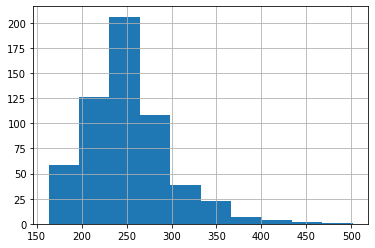

In [46]:
# uses matplotlib, more on this later...
data_df2.loc[:,'MolecularWeight'].hist()
plt.show()

Lastly, we can operate on data directly within DataFrames to, for example, create a new columns of calculations. As an example, let's say we wanted to create  new column, my_descriptor, which is equal to the MolecularWeight divided by the HeavyAtomCount:

In [47]:
data_df2.loc[:,"my_descriptor"] = (data_df2.loc[:,"MolecularWeight"] / data_df2.loc[:,"HeavyAtomCount"])
data_df2

,IsomericSmiles,MolecularFormula,MolecularWeight,RotatableBondCount,HeavyAtomCount,AtomChiralCount,my_descriptor
CID,,,,,,,
146168522,CCN(CC(=O)C)C(C1=CC=CC=C1)C(=O)OC(C)(C)C,C17H25NO3,291.40,8,21,1,13.876190
146168519,CCN(CC(=O)OCC)C(C1=CC=CC=C1)C(=O)OC,C15H21NO4,279.33,9,20,1,13.966500
146161459,C1=CC=C(C=C1)CN(CC2=CC=CC=C2)C(C3=CC=C(C=C3)F)...,C22H20FNO2,349.40,7,26,1,13.438462
145524776,CC.CCCN1CCN(CC1)C(C2=CC=CC=C2CC)C(=O)O,C19H32N2O2,320.50,6,23,1,13.934783
145520251,CC.CC.CCC.CC(=C)N1CCN(CC1)C(C2=CC=CC=C2)C(=O)O,C22H40N2O2,364.60,4,26,1,14.023077
...,...,...,...,...,...,...,...
140236,CN(C)C(CC1=CC=CC=C1)C(=O)O,C11H15NO2,193.24,4,14,1,13.802857
51840,CCCCN(CCCC)C(C1=CC=CC=C1)C(=O)O,C16H25NO2,263.37,9,19,1,13.861579
51839,CCCC[NH+](CCCC)C(C1=CC=CC=C1)C(=O)O.[Cl-],C16H26ClNO2,299.83,9,20,1,14.991500


[7] http://swcarpentry.github.io/python-novice-gapminder/07-reading-tabular/index.html

# matplotlib Python Library [8-10]

Matplotlib is a popular Python library for creating visual plots. The pyplot collection of functions provides MATLAB like plotting [10]. The recommended way to import matplotlib.pyplot is as follows:

In [48]:
import numpy as np
import matplotlib.pyplot as plt

## Plot from Lists

In [49]:
# create two lists
x = [10, 20, 30, 40, 50]
y = [23, 400, 32, 200, 300]

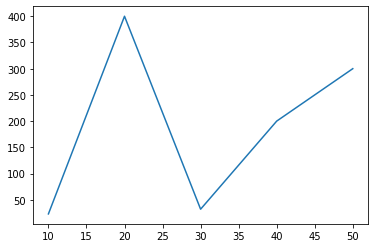

In [50]:
plt.plot(x,y) # create a line plot with plot function
plt.show() # display plot

There are many options for plotting available in matplotlib. For example, we can add labels, specify data marker types, adjust sizes, plot type, and much much more. See the list of [pyplot functions](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot) as well as options within each function.

As an example, let's:

1. Adjust the figure size
2. Use red circle markers
3. Add labels
4. Adjust font sizes

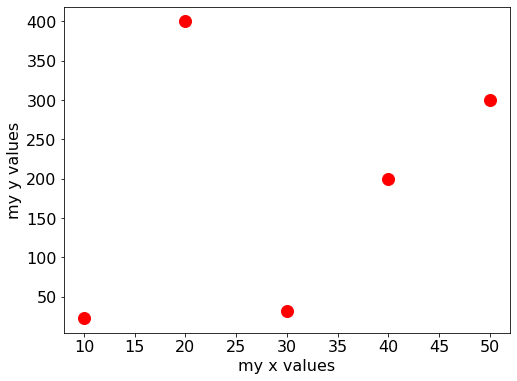

In [51]:
# we can make the figure larger if we want:
plt.figure(figsize=(8,6))
plt.plot(x,y, 'ro', markersize=12) # red circle markers, size 12
plt.xticks(size=16) # adjust xtick font size
plt.yticks(size=16) # adjust xtick font size
plt.ylabel('my y values', fontsize = 16) # add y label
plt.xlabel('my x values', fontsize = 16) # add x label
plt.show() # display plot

There are also many built-in [styles](https://matplotlib.org/stable/tutorials/introductory/customizing.html) that you can use.

In [52]:
# list available styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


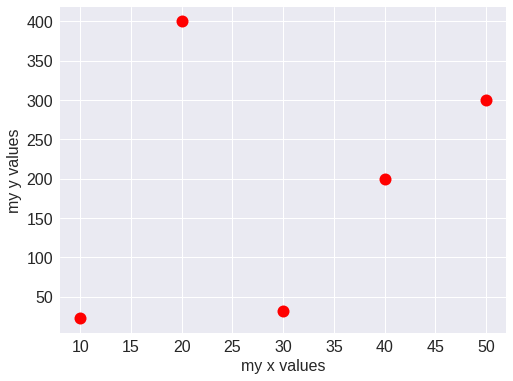

In [53]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
plt.plot(x,y, 'ro', markersize=12) # red circle markers, size 12
plt.xticks(size=16) # adjust xtick font size
plt.yticks(size=16) # adjust xtick font size
plt.ylabel('my y values', fontsize = 16) # add y label
plt.xlabel('my x values', fontsize = 16) # add x label
plt.show() # display plot

In [54]:
# revert back to default style:
# see: https://stackoverflow.com/questions/43279137/what-is-the-name-of-the-default-style-for-matplotlib-2-0-0
plt.style.use('default')

[8] http://swcarpentry.github.io/python-novice-gapminder/09-plotting/index.html

[9] https://matplotlib.org/stable/api/index.html

[10] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot

## Plot from a Pandas DataFrame [8-11]

[Pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization) is a wrapper for matplotlib plt.plot(). This is very convenient, and allows us to easily plot data directly from pandas DataFrames. To get started, import numpy, matplotlib, and pandas.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We'll use our data_df2 DataFrame for plotting:

In [56]:
data_df2.head(10)

,IsomericSmiles,MolecularFormula,MolecularWeight,RotatableBondCount,HeavyAtomCount,AtomChiralCount,my_descriptor
CID,,,,,,,
146168522,CCN(CC(=O)C)C(C1=CC=CC=C1)C(=O)OC(C)(C)C,C17H25NO3,291.40,8,21,1,13.876190
146168519,CCN(CC(=O)OCC)C(C1=CC=CC=C1)C(=O)OC,C15H21NO4,279.33,9,20,1,13.966500
146161459,C1=CC=C(C=C1)CN(CC2=CC=CC=C2)C(C3=CC=C(C=C3)F)...,C22H20FNO2,349.40,7,26,1,13.438462
145524776,CC.CCCN1CCN(CC1)C(C2=CC=CC=C2CC)C(=O)O,C19H32N2O2,320.50,6,23,1,13.934783
145520251,CC.CC.CCC.CC(=C)N1CCN(CC1)C(C2=CC=CC=C2)C(=O)O,C22H40N2O2,364.60,4,26,1,14.023077
145086414,CC.CC(C)N(C)C(CC1=CC=CC=C1)C(=O)O,C15H25NO2,251.36,5,18,1,13.964444
144259917,CN(C)C(C1=CC=CC=C1C(F)(F)F)C(=O)O.Cl,C11H13ClF3NO2,283.67,3,18,1,15.759444
144187943,CC1CCC(=C)N1C(C2=CC=CC=C2)C(=O)O,C14H17NO2,231.29,3,17,2,13.605294
144097938,CCC(CCN(C)C(C1=CC=CC=C1)C(=O)O)O,C14H21NO3,251.32,7,18,2,13.962222


Let's create a histogram of the molecular weight again, using [DataFrame.hist()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html). However, now we'll adjust some of the options:

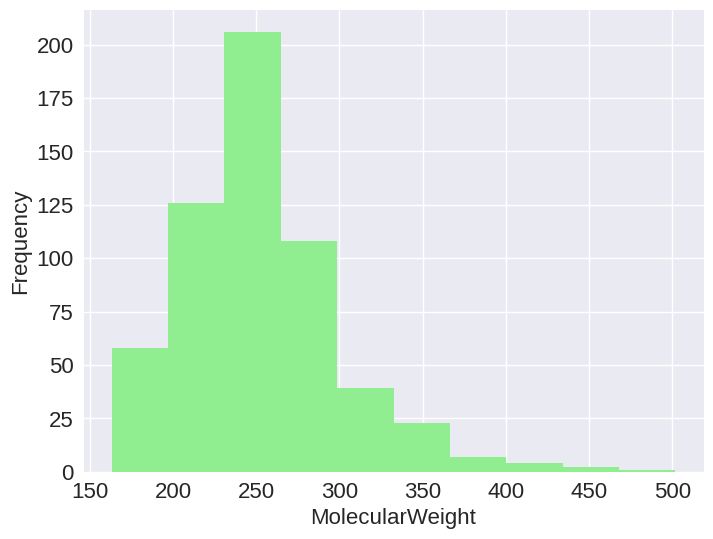

In [57]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
data_df2.loc[:,'MolecularWeight'].hist(color="lightgreen") # note we indexed out MolecularWeight first
plt.xticks(size=16)
plt.yticks(size=16)
plt.ylabel('Frequency', size=16)
plt.xlabel('MolecularWeight', size=16)
plt.show()

We can also plot several columns at a time:

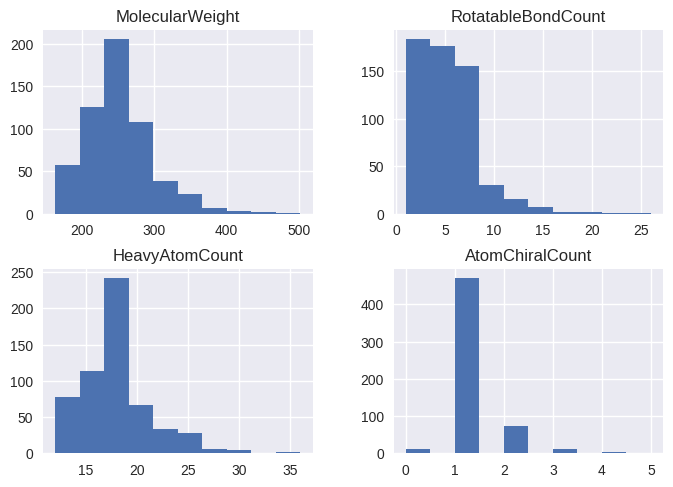

In [58]:
data_df2.loc[:,'MolecularWeight':'AtomChiralCount'].hist()
plt.show()

Let's create a scatter plot using [pandas.DataFrame.plot.scatter()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html):

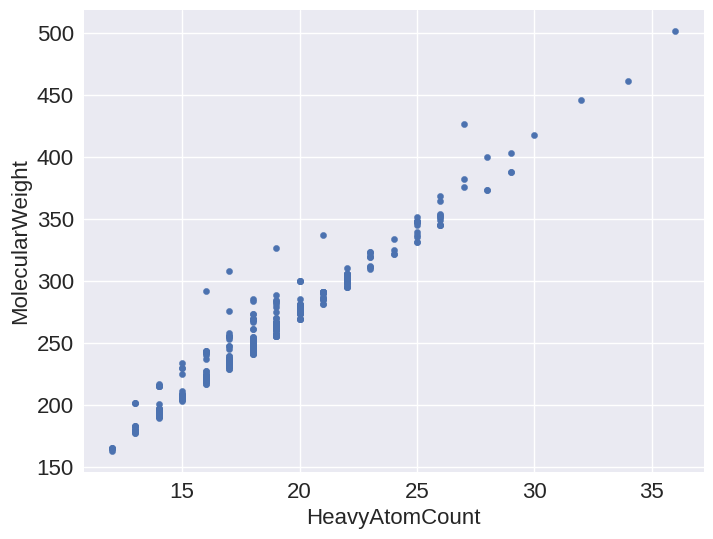

In [59]:
data_df2.plot.scatter(x = "HeavyAtomCount", y = "MolecularWeight", figsize=(8,6))
plt.xticks(size=16)
plt.yticks(size=16)
plt.ylabel('MolecularWeight', size=16)
plt.xlabel('HeavyAtomCount', size=16)
plt.show()

[8] http://swcarpentry.github.io/python-novice-gapminder/09-plotting/index.html

[9] https://matplotlib.org/stable/api/index.html

[10] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot

[11] https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization

# Additional Resources

[1] https://jakevdp.github.io/PythonDataScienceHandbook/

# Notebook Copy

An archived version of this notebook with (most) outputs is available on our UALIB_Workshops GitHub repository: https://github.com/vfscalfani/UALIB_Workshops

Note: The molecular dataset was retrieved from NCBI via their EDirect utility and is credited to NCBI and NLM. Please see the [NCBI Website and Data Usage Policies and Disclaimers](https://www.ncbi.nlm.nih.gov/home/about/policies/) for more information regarding the data.